# 8. Calling other programs

## C

Julia has a native interface for calling C functions via `ccall`:

In [1]:
ccall(("pow","libm"),Cdouble,(Cdouble,Cdouble),10.0,3.0)

1000.0

`ccall` takes the following arguments 
1. a (function, library) tuple
 * "libm" is the system math library
 * "pow" is the power function
2. the return type
 * Julia defines aliases for C types (in this case, `Cdouble` is an alias for `Float64`)
3. a tuple of the argument types
4. the argument values

This makes it very easy to interface with other software packages.

## R

RCall.jl provides an interface to R objects and functions.

In [2]:
Pkg.add("RCall")

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of RCall
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [3]:
using RCall

`rcall` is used to call R functions: the result is returned as an `RObject`, which is a Julia wrapper around an R object.

In [27]:
x = reval("0:10")

RCall.RObject{RCall.IntSxp}
 [1]  0  1  2  3  4  5  6  7  8  9 10


This can be converted to a Julia object via `rcopy`:

In [30]:
rcopy(Vector{Int64},x)

11-element Array{Int64,1}:
  0
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

Most Julia objects can be passed as arguments, which are converted automatically to R objects (including functions).

Plots also (should) also work.

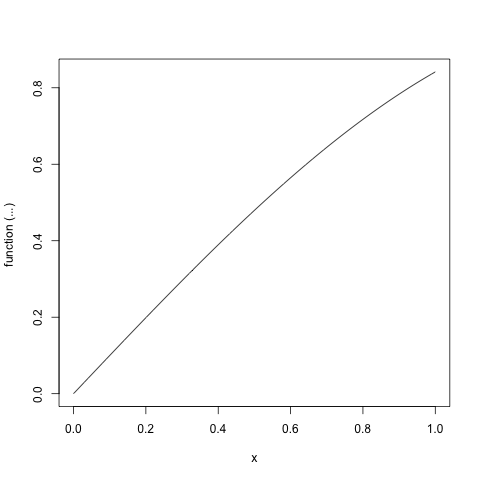

In [7]:
rcall(:plot, sin);

However you can get some odd behaviour due to R's nonstandard evaluation:

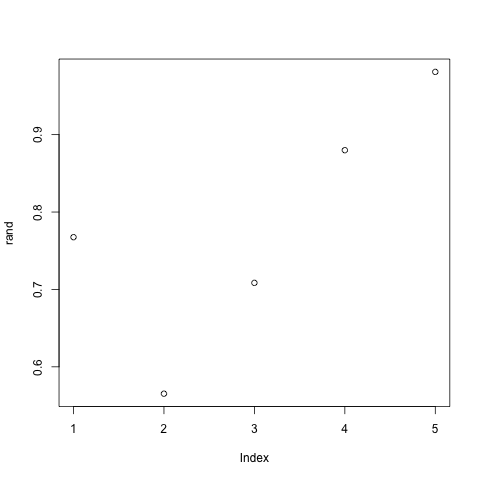

In [12]:
rcall(:plot,rand(5),ylab="rand");

In [19]:
@rimport ggplot2

LoadError: LoadError: base already exists!
while loading In[19], in expression starting on line 47

In [20]:
rplot(x...;y...) = rcall(:plot,x...;y...)

rplot (generic function with 1 method)

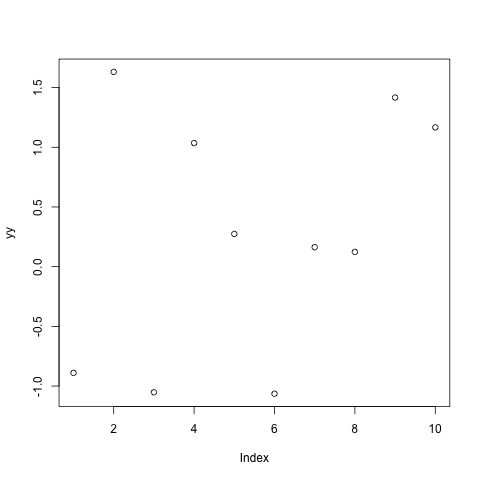

RCall.RObject{RCall.NilSxp}
NULL


In [22]:
rplot(randn(10),ylab="yy")

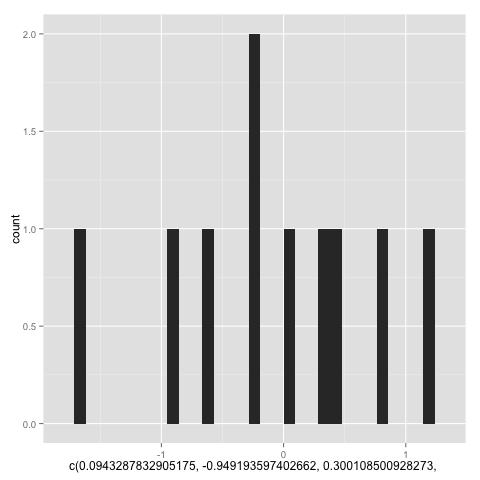

RCall.RObject{RCall.VecSxp}


In [16]:
ggplot2.qplot(randn(10))

`reval` can be used to execute arbitrary R code:

In [18]:
reval("x <- rnorm(10)")

RCall.RObject{RCall.RealSxp}
 [1] -1.24210805 -0.87314954  0.38023488 -0.07996570 -0.05547741 -1.11399290
 [7]  1.82208993  0.44439249  0.28273584 -1.21180171


## Other

There are similar interfaces to Python (PyCall.jl) and Matlab (MATLAB.jl). Also there is a highly experimental C++ interface (Cxx.jl) which allows inlining C++ code that is then JIT compiled on demand.